In [36]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
le = preprocessing.LabelEncoder()

### Load Data

In [37]:
#Load the data
df = pd.read_csv('garments_worker_productivity.csv')

#View the data
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Explore Data

In [38]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [39]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [40]:
df.shape

(1197, 15)

In [41]:
#Describe the data
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [42]:
df.duplicated().sum()

0

In [43]:
#unique values
df['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

In [44]:
df.team.value_counts()

8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [45]:
#Find null values

df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [46]:
#Replace null values

df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [47]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                       object
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [48]:
df[df['team']==1].head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681,6900,45,0.0,0,0,57.5,0.750428
23,1/3/2015,Quarter1,finishing,Saturday,1,0.80,3.94,0,960,0,0.0,0,0,8.0,0.902917
24,1/3/2015,Quarter1,sweing,Saturday,1,0.80,28.08,772,6300,50,0.0,0,0,56.5,0.800725
42,1/4/2015,Quarter1,finishing,Sunday,1,0.80,3.94,0,960,0,0.0,0,0,8.0,0.915229


### Label Encoding

In [49]:
le = preprocessing.LabelEncoder()
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df['department'] = df['department'].astype(str)
df['day'] = df['day'].astype(str)
df['quarter'] = df['quarter'].astype(str)

In [50]:
df['wip'] = df['wip'].astype(str)
df['date']= le.fit_transform(df['date'])
df['quarter']= le.fit_transform(df['quarter'])
df['department']= le.fit_transform(df['department'])
df['day']= le.fit_transform(df['day'])

In [51]:
df.actual_productivity.describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

### Graphs

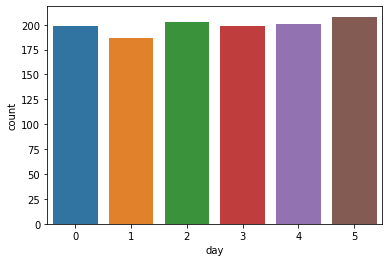

In [52]:
#Plot the unique values
sns.countplot(df['day'])

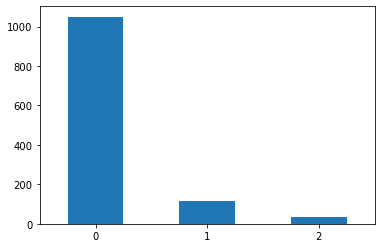

In [53]:
df.no_of_style_change.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

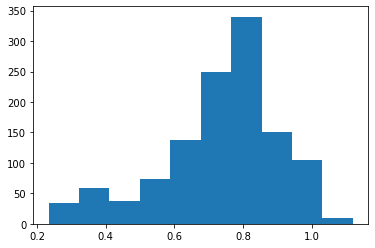

In [54]:
plt.hist(df['actual_productivity'])
plt.show() 

In [55]:
print(f"Skewness: {df['actual_productivity'].skew()}")
print(f"Kurtosis: {df['actual_productivity'].kurt()}")

Skewness: -0.8074917745097576
Kurtosis: 0.33322734124329134


no_of_style_change
idle_men?
smv
team?
incentive?

targeted_productivity?

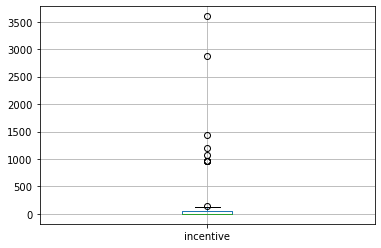

In [56]:
#Boxplot

df[['incentive']].boxplot()

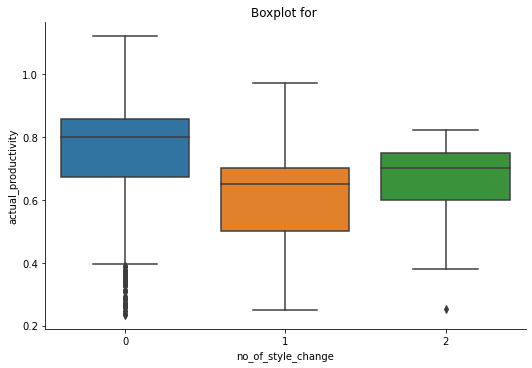

In [57]:
sns.catplot(x="no_of_style_change", y="actual_productivity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for ")
plt.show()

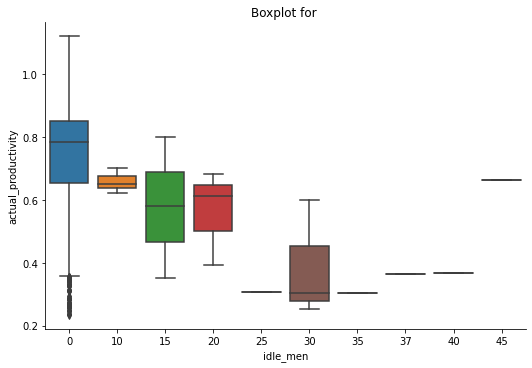

In [58]:
sns.catplot(x="idle_men", y="actual_productivity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for ")
plt.show()

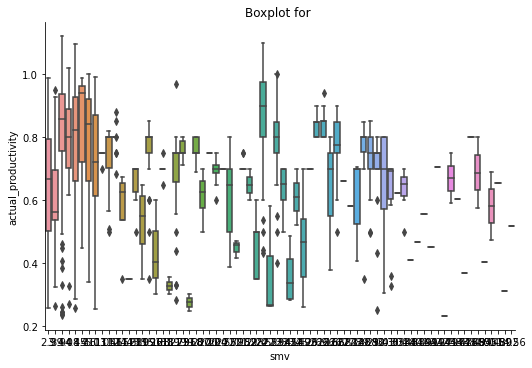

In [59]:
sns.catplot(x="smv", y="actual_productivity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for ")
plt.show()

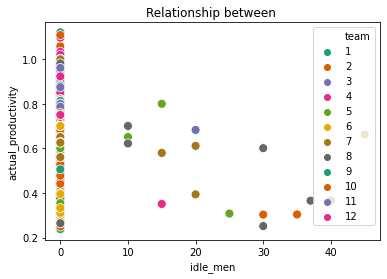

In [60]:
sns.scatterplot(x="idle_men", y="actual_productivity", hue="team", data=df, palette="Dark2", s=80)
plt.title("Relationship between ")
plt.show()

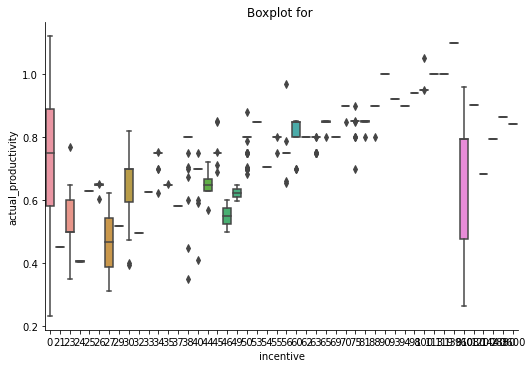

In [61]:
sns.catplot(x="incentive", y="actual_productivity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for ")
plt.show()

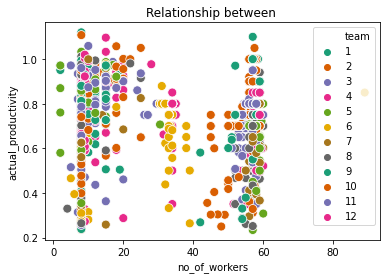

In [62]:
sns.scatterplot(x="no_of_workers", y="actual_productivity", hue="team", data=df, palette="Dark2", s=80)
plt.title("Relationship between ")
plt.show()

In [54]:
df['date']= le.fit_transform(df['date'])
df['quarter']= le.fit_transform(df['quarter'])
df['department']= le.fit_transform(df['department'])
df['day']= le.fit_transform(df['day'])

### Correlation

In [63]:
df.corr()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,1.000000,0.056061,-0.239140,0.083156,0.008721,-0.100499,0.001652,-0.255787,0.104726,0.008221,0.078125,0.315252,-0.011251,-0.122365
quarter,0.056061,1.000000,0.018347,-0.024301,0.021038,-0.112319,-0.000105,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970
department,-0.239140,0.018347,1.000000,-0.018350,0.026150,-0.045865,0.797716,0.629531,-0.007455,0.045000,0.088480,0.275308,0.857813,-0.035647
day,0.083156,-0.024301,-0.018350,1.000000,-0.011434,-0.017908,0.007971,-0.018269,-0.114016,-0.008913,0.029340,0.025941,0.008078,-0.015690
team,0.008721,0.021038,0.026150,-0.011434,1.000000,0.030274,-0.110011,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,-0.100499,-0.112319,-0.045865,-0.017908,0.030274,1.000000,-0.069489,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,0.001652,-0.000105,0.797716,0.007971,-0.110011,-0.069489,1.000000,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
over_time,-0.255787,0.026654,0.629531,-0.018269,-0.096737,-0.088557,0.674887,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.104726,-0.028237,-0.007455,-0.114016,-0.007674,0.032768,0.032629,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.008221,-0.060779,0.045000,-0.008913,0.003796,-0.056181,0.056863,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851


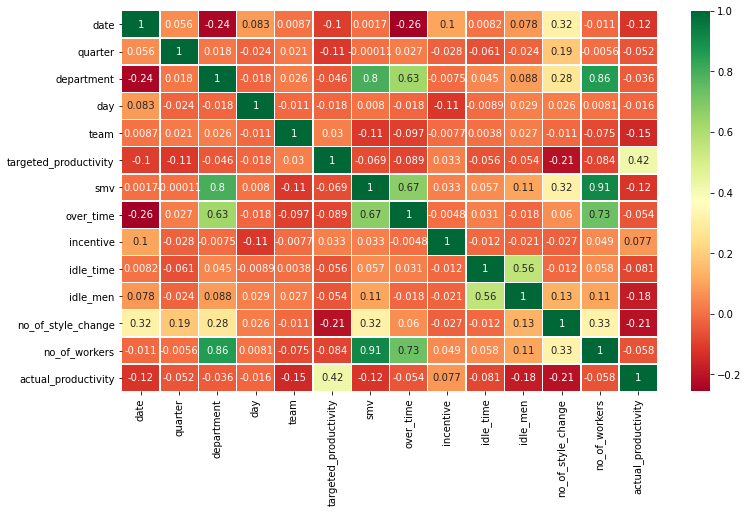

In [64]:
#Correlation 
corrmat = df.corr()

# Defining figure size for the output plot 
fig, ax = plt.subplots(figsize = (12, 7))
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlGn
sns.heatmap(corrmat, cmap ='RdYlGn', linewidths = 0.30, annot = True)

In [35]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E6EE716CA0> (for post_execute):


KeyboardInterrupt: 

### Principal Component Analysis

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [81]:
scaled_data.shape

(1197, 14)

In [82]:
x_pca.shape

(1197, 2)

Text(0, 0.5, 'Second Principal Component')

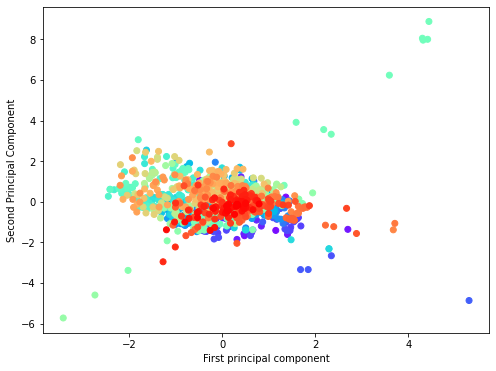

In [91]:
plt.figure(figsize=(8,6))
a = np.arange(0, 1197)

plt.scatter(x_pca[:,0],x_pca[:,1],c=a,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

               0             1             2
0   1.000000e+00 -8.496811e-17  7.933254e-18
1   8.494508e-17  1.000000e+00  7.675809e-15
2  -7.933254e-18 -7.675809e-15  1.000000e+00
3   2.991246e-18  2.202048e-17  1.048760e-15
4   2.945420e-18 -2.897105e-17 -3.986839e-17
5   5.118236e-19 -3.429705e-18 -1.250979e-17
6  -1.395558e-18 -3.085235e-18  3.543028e-18
7  -3.645761e-18 -1.825121e-18 -1.234834e-16
8  -1.082064e-18  4.995024e-19  1.168256e-17
9  -1.153196e-17  4.195910e-17 -1.361252e-16
10 -1.445461e-16  1.142822e-16 -2.750206e-17
11 -3.668630e-17 -1.156627e-16  2.635822e-17
12  3.156868e-17  4.993828e-17 -5.613773e-17
13 -9.919535e-19 -3.691636e-18  3.452407e-18


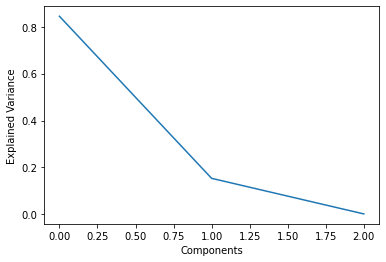

In [95]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=3)
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [96]:
# Transform the data to the new feature space
X_transformed = pca.transform(df)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'